<a href="https://colab.research.google.com/github/sorandomchad/projects/blob/main/Admissions_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Admission with Regression
## Chad Callender

In this project, we will be using application factors (such as test scores) to predict the likelihood that an applicant will be accepted to graduate school.

## Task 1: Load Data
This dataset is taken from the [Graduate Admission 2](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions) Dataset on Kaggle.

In [ ]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
# load data
data = pd.read_csv('Admission_Predict.csv')

# inspect data
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Task 2: Inspect data
In this section, we inspect data types, look for missing data, and print summary statistics.

In [ ]:
# inspect dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
# summary stats
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Task 3: Split data into features and labels

### Task 3.1: Features
The `Serial No.` column represents a primary identifier in the table and therefore is not useful in predicting outcomes. We will exclude this from the features.

In [ ]:
# features
X = data.iloc[:,1:-1]

# inspect
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

### Task 3.2: Labels
The label `Chance of Admit` is the variable we are trying to predict.

In [ ]:
# label
y = data.iloc[:,-1]

# inspect
y.head(1)

,Chance of Admit
0,0.92


## Task 4: Split into training and test sets

In [ ]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Task 5: Standardize the data
Here, we standardize the numerical features using z-score normalization so that each variable is on the same scale

### Task 5.1: Standardize training features
We standardize the features in the training set by training a `StandardScaler` model to the training features and using the trained model to standardize the features.

In [ ]:
# instantiate a column transformer and standardizer
ct = ColumnTransformer([('standardize', StandardScaler(), X.columns)], remainder='passthrough')

In [ ]:
# train standardizer and transform features
X_train_scaled = ct.fit_transform(X_train)

### Task 5.2: Standardize test features
To prevent information from "leaking" from the training to test set, we apply the model that was fit on the training features to transform the test features instead of training another standardizer.

In [ ]:
# transform test features
X_test_scaled = ct.transform(X_test)

## Task 6: Build a Regression model

### Task 6.1: Instantiate a model
We will be using a `Sequential` model from `Keras`.

In [ ]:
# instantiate a Sequential model
model = Sequential()

### Task 6.2: Add input layer
The shape of the input data will be the number of features in the dataset.

In [ ]:
# add input layer
num_features = X.shape[1]
model.add(InputLayer(shape=(num_features,)))

### Task 6.3: Add hidden layers


In [ ]:
# add hidden layers
model.add(Dense(16, activation='relu'))

### Task 6.4: Add output layer
Since this is a regression task predicting one number per data point, we only need one neuron here.

In [ ]:
# add output layer
model.add(Dense(1))

### Task 6.5: Compile optimizer

In [ ]:
# instantiate optimizer
opt = Adam(learning_rate=0.01)

# add optimizer to model
model.compile(loss='mse', metrics=['mae'], optimizer=opt)

### Task 6.6: Train model

In [ ]:
# train model
history = model.fit(X_train_scaled, y_train, epochs=60, batch_size=8, verbose=1, validation_split=0.2)

Epoch 1/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.2276 - mae: 0.3729 - val_loss: 0.0440 - val_mae: 0.1487
Epoch 2/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0294 - mae: 0.1397 - val_loss: 0.0277 - val_mae: 0.1194
Epoch 3/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mae: 0.1037 - val_loss: 0.0150 - val_mae: 0.0866
Epoch 4/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - mae: 0.0803 - val_loss: 0.0106 - val_mae: 0.0730
Epoch 5/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0117 - mae: 0.0831 - val_loss: 0.0087 - val_mae: 0.0691
Epoch 6/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0084 - mae: 0.0691 - val_loss: 0.0071 - val_mae: 0.0638
Epoch 7/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0073 - mae: 0.0655 - val_loss: 0.0069 - val_mae: 0.0602
Epoch 8/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0076 - mae: 0.0692 - val_loss: 0.0079 - val_mae: 0.0666
Epoch 9/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0074 - mae:

### Task 6.7: Evaluate model
We will use MSE and MAE to evaluate the model on the test set.

In [ ]:
# evaluate performance
test_mse, test_mae = model.evaluate(X_test_scaled, y_test, verbose=1)

test_mse, test_mae

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mae: 0.0622 


(0.005633592139929533, 0.05822473019361496)

## Task 7: Plot the loss curves
Here, we plot the loss for each epoch.

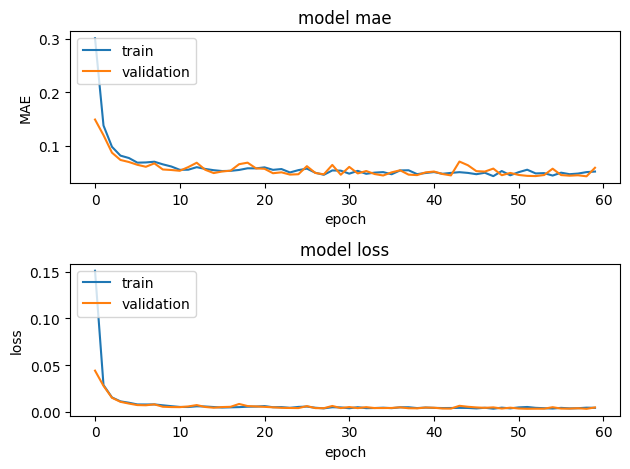

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

# used to keep plots from overlapping each other
fig.tight_layout()
# fig.savefig('static/images/my_plots.png')


## Task 8: Calculate R2 score
We will calculate the R2 score to evaluate how well the model predicts the test labels.

In [ ]:
# make model predictions
y_pred = model.predict(X_test_scaled)

y_pred.shape
# calculate r2 score
r2_score(y_test, y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


0.7613510797319734